# Лабораторна 1
### Пошук мінімального острового дерева алгоритмом Крускала

In [25]:
import numpy as np
from lab1.graph import Graph
with open("lab1/l1_2.txt",'r') as f:
    n = int(f.readline())
    string = f.readlines()
string_matrix = list(map(lambda y: y.strip().split(' '),string))
matrix = np.array([list(map(int, x)) for x in string_matrix])
print(f"Розмірність: {n}")
print(matrix)

Розмірність: 8
[[ 0  3  0  0  0 34  0 80]
 [ 3  0  0  1  0  0  0 68]
 [ 0  0  0  0 23  0 12  0]
 [ 0  1  0  0 53  0  0 39]
 [ 0  0 23 53  0  0 68 14]
 [34  0  0  0  0  0  0 25]
 [ 0  0 12  0 68  0  0 99]
 [80 68  0 39 14 25 99  0]]


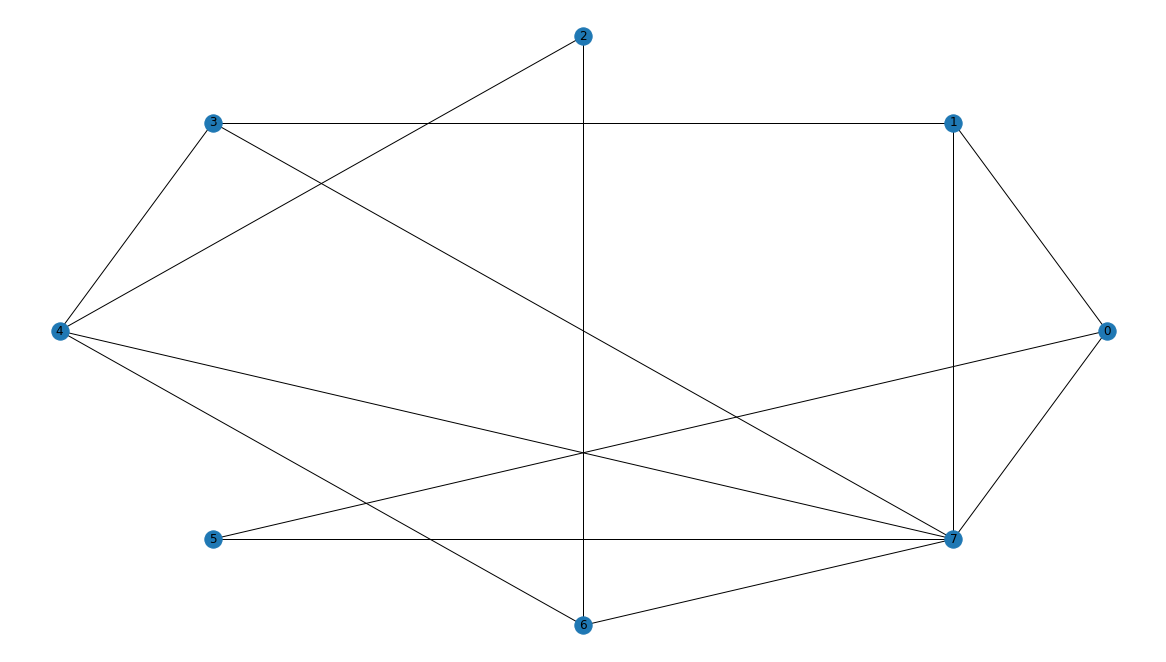

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
vis = nx.Graph(matrix)
plt.figure(figsize=(16, 9))
nx.draw_circular(vis,with_labels=True)

In [28]:
g = Graph(n)
for i in range(n-1):
    for j in range(i,n):
        if matrix[i][j] > 0:
            g.addEdge(i, j, matrix[i][j])
result = g.KruskalMST()

Мінімальне остовне дерево:
1 -- 3, вага: 1
0 -- 1, вага: 3
2 -- 6, вага: 12
4 -- 7, вага: 14
2 -- 4, вага: 23
5 -- 7, вага: 25
0 -- 5, вага: 34
Загальна вага: 112


In [29]:
res = np.zeros((n,n))
for v in result:
    res[v[0]][v[1]] = v[2]
    res[v[1]][v[0]] = v[2]
res

array([[ 0.,  3.,  0.,  0.,  0., 34.,  0.,  0.],
       [ 3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 23.,  0., 12.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 23.,  0.,  0.,  0.,  0., 14.],
       [34.,  0.,  0.,  0.,  0.,  0.,  0., 25.],
       [ 0.,  0., 12.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14., 25.,  0.,  0.]])

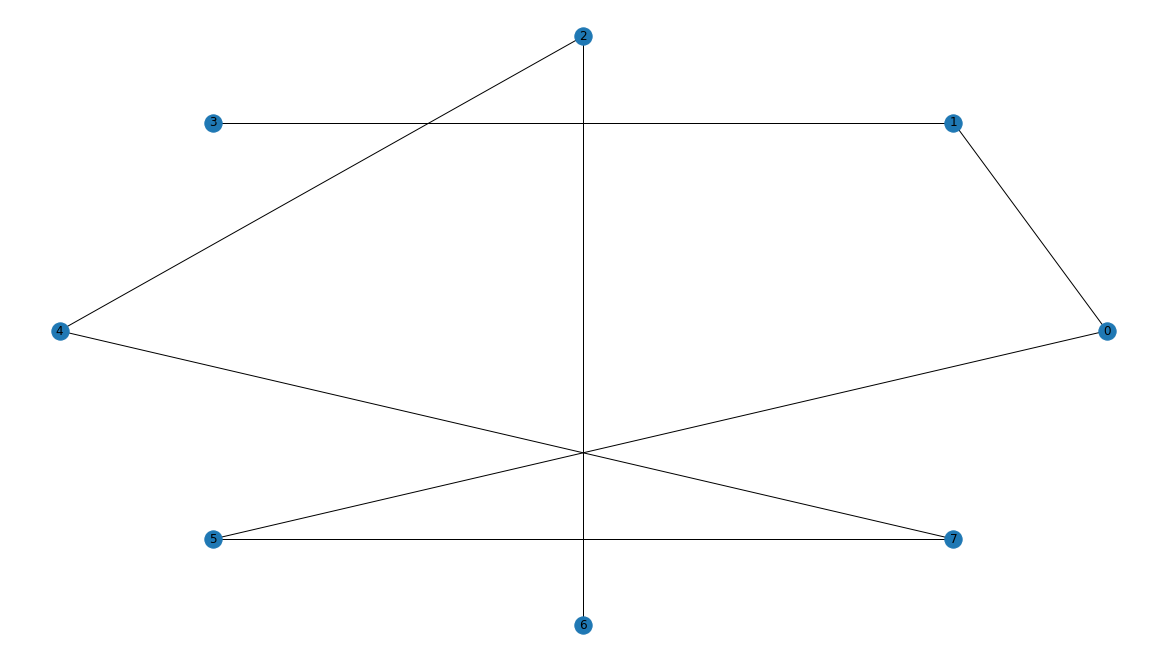

In [30]:
vis = nx.Graph(res)
plt.figure(figsize=(16, 9))
nx.draw_circular(vis,with_labels=True)

# Лабораторна 2
### Задача листоноші

In [6]:
import numpy as np
from lab2.tsp import chinese
with open("lab2/l2-2.txt",'r') as f:
    n = int(f.readline())
    string = f.readlines()
string_matrix = list(map(lambda y: y.strip().split(' '),string))
matrix = np.array([list(map(int, x)) for x in string_matrix])
print(f"Розмірність: {n}")
print(matrix)

Розмірність: 8
[[ 0  0 29 40  0 61 17 15]
 [ 0  0  0 59 36  0  0 60]
 [29  0  0  0  0  0 21  0]
 [40 59  0  0 27 88  0 92]
 [ 0 36  0 27  0 57 71  0]
 [61  0  0 88 57  0 81  0]
 [17  0 21  0 71 81  0  0]
 [15 60  0 92  0  0  0  0]]


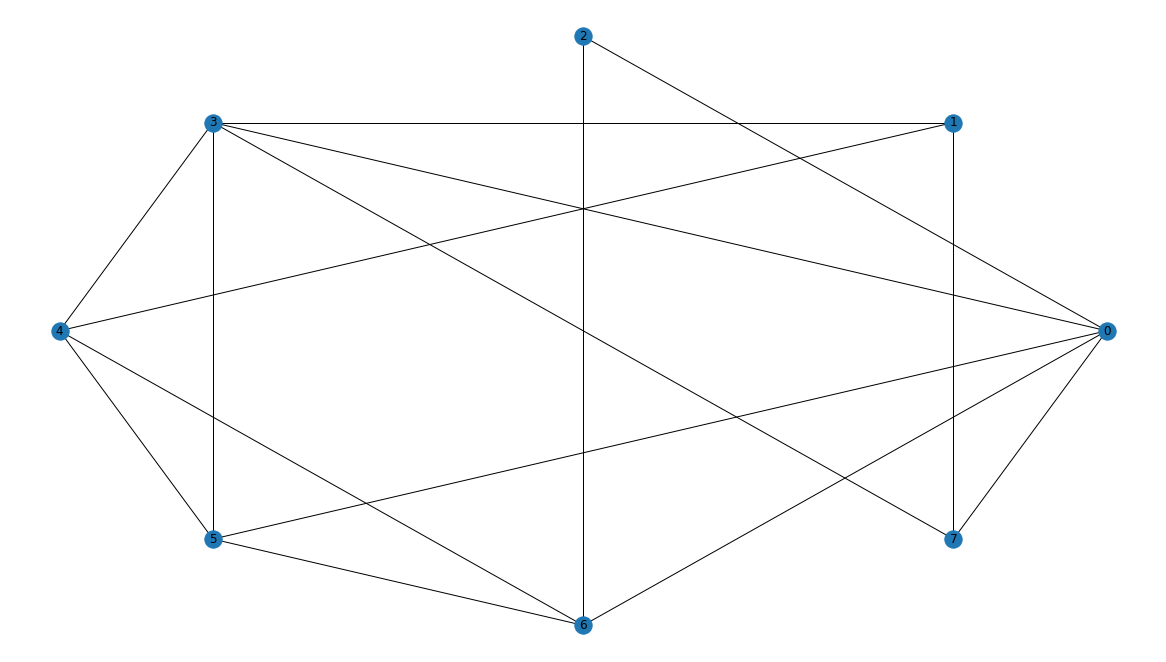

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
vis = nx.Graph(matrix)
plt.figure(figsize=(16, 9))
nx.draw_circular(vis,with_labels=True)

In [8]:
chinese(matrix)

Вершини з непарною кількістю ребер [0, 1, 3, 7]
Можливі маршрути між непарними вершинами:
[0, 75, 29, 40, 67, 61, 17, 15]
[75, 0, 104, 59, 36, 93, 92, 60]
[29, 104, 0, 69, 92, 90, 21, 44]
[40, 59, 69, 0, 27, 84, 57, 55]
[67, 36, 92, 27, 0, 57, 71, 82]
[61, 93, 90, 84, 57, 0, 78, 76]
[17, 92, 21, 57, 71, 78, 0, 32]
[15, 60, 44, 55, 82, 76, 32, 0]
Маршрут:
[0, 7, 3, 1, 7, 0, 5, 6, 4, 5, 3, 4, 1, 3, 0, 6, 2, 0]
Загальна вага маршруту: 828


828

### Пошук маршруту у парному графі

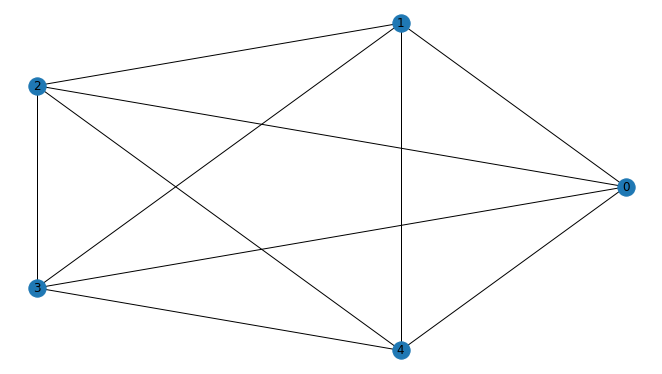

In [35]:
matrix = [[0,1,1,1,1],
    [1,0,1,1,1],
    [1,1,0,1,1],
    [1,1,1,0,1],
    [1,1,1,1,0],
]
matrix = np.array(matrix)
import networkx as nx
import matplotlib.pyplot as plt
vis = nx.Graph(matrix)
plt.figure(figsize=(9, 5))
nx.draw_circular(vis,with_labels=True)

In [18]:
chinese(matrix)

Граф парний, оптимальним маршрутом буде Ейлеровий цикл
Маршрут:
[0, 4, 3, 2, 4, 1, 3, 0, 2, 1, 0]
Загальна вага маршруту: 10


10

### Пошук маршруту при відсутності вирішення задачі

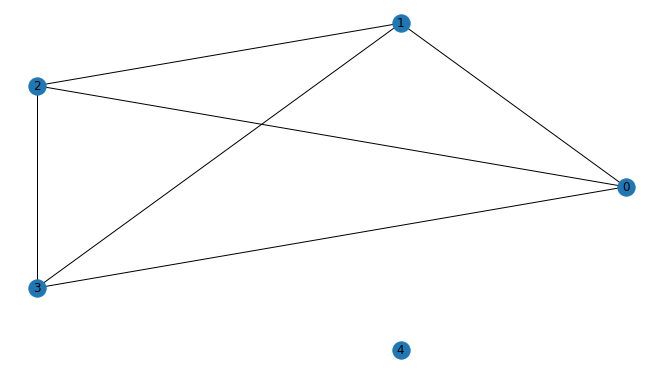

In [34]:
matrix = [[0,1,1,1,0],
    [1,0,1,1,0],
    [1,1,0,1,0],
    [1,1,1,0,0],
    [0,0,0,0,0],
]
matrix = np.array(matrix)
import networkx as nx
import matplotlib.pyplot as plt
vis = nx.Graph(matrix)
plt.figure(figsize=(9, 5))
nx.draw_circular(vis,with_labels=True)

In [31]:
chinese(matrix)

Маршрут не знайдено


0

# Лабораторна 3
### Задача комівояжера

In [1]:
from lab3.branch import branchAndBound
matrix = branchAndBound('lab3/l3-3.txt')

Розмірність: 6
[0, 35, 40, 54, 69, 87]
[35, 0, 0, 89, 43, 0]
[40, 0, 0, 79, 0, 54]
[54, 89, 79, 0, 16, 0]
[69, 43, 0, 16, 0, 0]
[87, 0, 54, 0, 0, 0]

Маршрут :  0 1 4 3 2 5 0 
Ціна    : 314


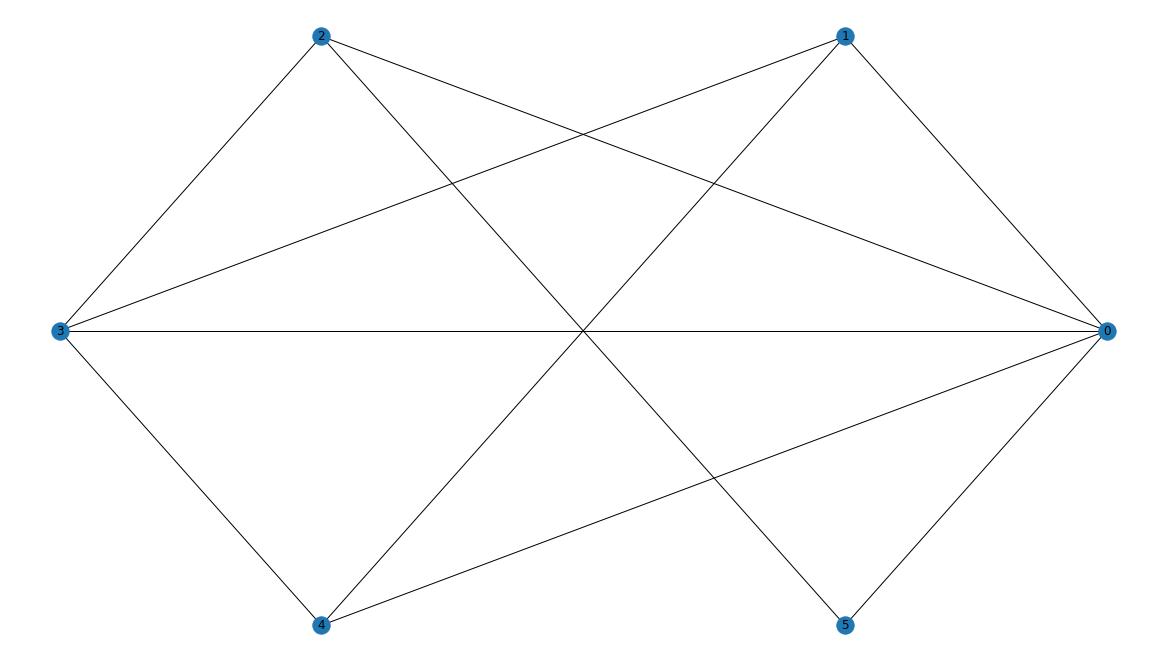

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
matrix = np.array(matrix)
vis = nx.Graph(matrix)
plt.figure(figsize=(16, 9))
nx.draw_circular(vis,with_labels=True)

# Лабораторна 4
### Потокові алгоритми

In [36]:
import numpy as np
from lab4.ford import fordFulkerson
with open("lab4/l4-1.txt",'r') as f:
    n = int(f.readline())
    string = f.readlines()
string_matrix = list(map(lambda y: y.strip().split(' '),string))
matrix = np.array([list(map(int, x)) for x in string_matrix])
print(f"Розмірність: {n}")
print(matrix)

Розмірність: 8
[[ 0 20 20 20  0  0  0  0]
 [ 0  0  0  0 30  0  0  0]
 [ 0 10  0  0  0 10 20  0]
 [ 0  0  0  0  0 15  0  0]
 [ 0  0 10  0  0 10  0 20]
 [ 0  0  0  0  0  0 10 20]
 [ 0  0  0 10  0  0  0 20]
 [ 0  0  0  0  0  0  0  0]]


In [37]:
fordFulkerson(matrix,0,7)

Максимальний потік з вершини 0 в 7: 55


55

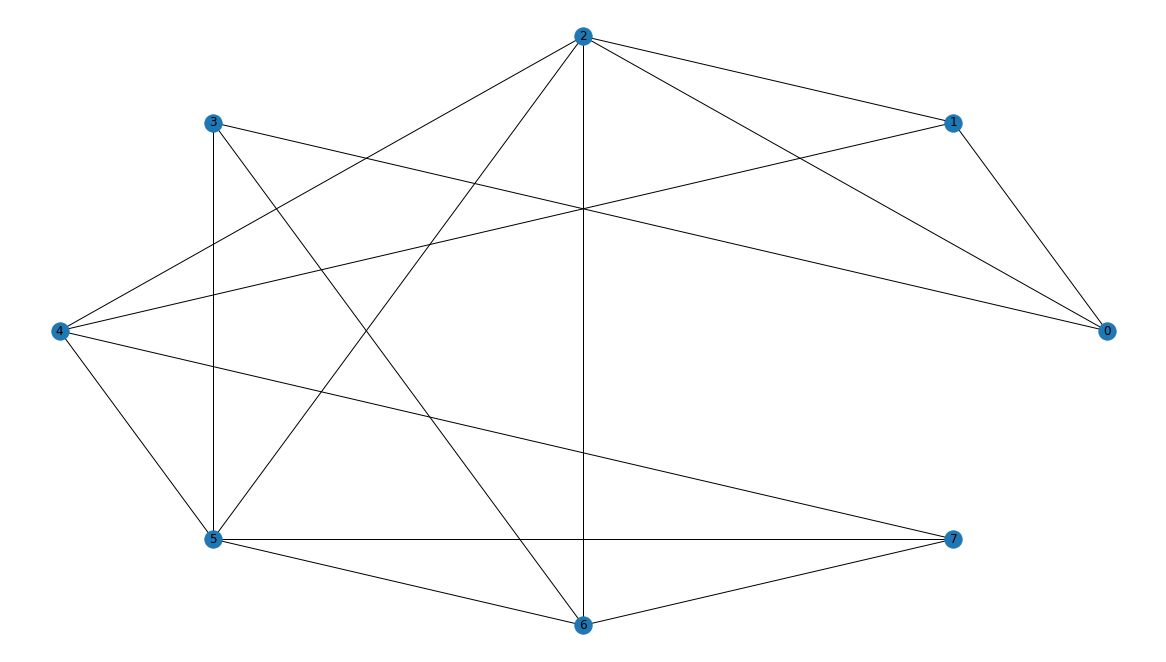

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
vis = nx.Graph(matrix)
plt.figure(figsize=(16, 9))
nx.draw_circular(vis,with_labels=True)